## Zadanie 1

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.

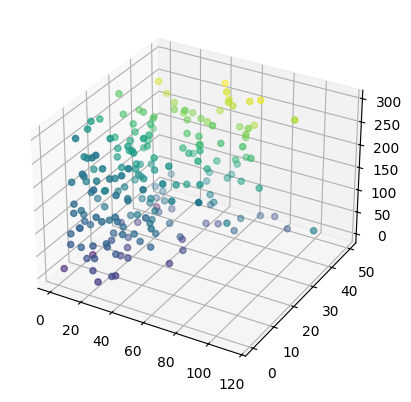

/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zen1x/AGH/S6/MIO/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

advertising_data = pd.read_csv(os.path.join("data", "Advertising.csv"))

X, y = (advertising_data[["TV", "Radio", "Newspaper"]], advertising_data["Sales"])


def find_and_remove_outliers(X, y):
    feature_means = X.mean()
    feature_stdevs = X.std()

    outlier_mask = (
        (X < feature_means - 3 * feature_stdevs)
        | (X > feature_means + 3 * feature_stdevs)
    ).any(axis=1)

    X_cleaned = X[~outlier_mask]
    y_cleaned = y[~outlier_mask]

    return X_cleaned, y_cleaned


def scale_data(X, y, scaler=MinMaxScaler()):
    return scaler.fit_transform(X, y)


def prepare_data(X, y, scaler=MinMaxScaler(), train_size=0.8):
    X, y = find_and_remove_outliers(X, y)
    X = scale_data(X, y, scaler)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=21
    )

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = prepare_data(X, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X["Newspaper"], X["Radio"], X["TV"], c=y)
plt.show()

architectures = [
    (10, 10),
    (20, 20),
    (20, 20, 20),
    (21, 37),
    (50, 50, 50),
    (250, 100, 50),
    (400, 250, 100, 50),
]
activation_funcs = ["relu", "tanh"]

results = []
for arch in architectures:
    for activation in activation_funcs:
        regressor = MLPRegressor(
            arch, activation, max_iter=2000, tol=1e-3, random_state=37
        )

        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        results.append(
            {
                "arch": arch,
                "activation": activation,
                "mse": mse,
                "predicted": y_pred,
                "regressor": regressor,
            }
        )

In [52]:
def print_mse(result):
    print(f"Arch: {result['arch']}, activation function: {result['activation']}")
    print(f"  MSE: {result['mse']:.4}")


for result in results:
    print_mse(result)

Arch: (10, 10), activation function: relu
  MSE: 2.306
Arch: (10, 10), activation function: tanh
  MSE: 15.79
Arch: (20, 20), activation function: relu
  MSE: 2.437
Arch: (20, 20), activation function: tanh
  MSE: 2.701
Arch: (20, 20, 20), activation function: relu
  MSE: 2.445
Arch: (20, 20, 20), activation function: tanh
  MSE: 2.073
Arch: (21, 37), activation function: relu
  MSE: 0.4734
Arch: (21, 37), activation function: tanh
  MSE: 1.184
Arch: (50, 50, 50), activation function: relu
  MSE: 11.32
Arch: (50, 50, 50), activation function: tanh
  MSE: 1.148
Arch: (250, 100, 50), activation function: relu
  MSE: 14.32
Arch: (250, 100, 50), activation function: tanh
  MSE: 1.002
Arch: (400, 250, 100, 50), activation function: relu
  MSE: 0.2035
Arch: (400, 250, 100, 50), activation function: tanh
  MSE: 33.02


## Zadanie 2

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

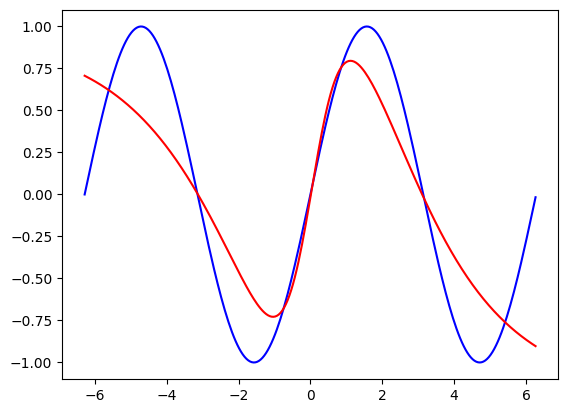

Wzór funkcji aproksymującej:
f(x) = +0.38063 * tanh(-0.23731 * x + 0.67437) -0.98171 * tanh(0.23325 * x + 0.037983) -0.23081 * tanh(-0.76318 * x + 0.18405) -0.48141 * tanh(0.3065 * x + 0.43469) -0.32406 * tanh(0.46611 * x + -1.2213) -0.75895 * tanh(-1.1641 * x + -0.097365) -0.71358 * tanh(-1.177 * x + 0.18313) +0.60369 * tanh(-0.23919 * x + -0.084768) -0.13116


In [53]:
from math import pi

x = np.arange(-2 * pi, 2 * pi, 0.05)
y = np.sin(x)

regressor = MLPRegressor((8,), "tanh", max_iter=2000, random_state=69)
regressor.fit(x.reshape(-1, 1), y)
y_pred = regressor.predict(x.reshape(-1, 1))

plt.plot(x, y, "b")  # actual -> blue
plt.plot(x, y_pred, "r")  # predicted -> red
plt.show()

w1 = regressor.coefs_[0].flatten()
b1 = regressor.intercepts_[0]
w2 = regressor.coefs_[1].flatten()
b2 = regressor.intercepts_[1][0]

print("Wzór funkcji aproksymującej:")
print("f(x) = ", end="")

terms = [f"{w2[i]:+.5} * tanh({w1[i]:.5} * x + {b1[i]:.5})" for i in range(len(w1))]
formula = " ".join(terms)
formula += f" {b2:+.5}"

print(formula)

## Zadanie 3

Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (`diabetes`) z biblioteki `sklearn.datasets` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta. Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2. Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.

Proszę skomentować, jak architektura sieci wpływa na aproksymację i zaproponować najmniejszą sieć, dla której wyniki są dla państwa zadowalające.

In [62]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

diabates = load_diabetes(as_frame=True)
X, y = diabates.data, diabates.target

X = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=21
)

architectures = [(10,), (20,), (10, 10), (20, 10), (20, 10, 5), (400, 200, 100, 50)]

results = []
for arch in architectures:
    regressor = MLPRegressor(arch, max_iter=30_000, random_state=2137)

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append(
        {"arch": arch, "mse": mse, "mape": mape, "r2": r2, "regressor": regressor}
    )

In [63]:
for result in results:
    print(f"Arch: {result['arch']}, iters: {result['regressor'].n_iter_}")

results_df = pd.DataFrame(results)
print(results_df.drop("regressor", axis=1))

Arch: (10,), iters: 14511
Arch: (20,), iters: 18664
Arch: (10, 10), iters: 9761
Arch: (20, 10), iters: 11405
Arch: (20, 10, 5), iters: 9696
Arch: (400, 200, 100, 50), iters: 499
                  arch          mse      mape        r2
0                (10,)  3542.537970  0.397022  0.360091
1                (20,)  3858.578708  0.384288  0.303003
2             (10, 10)  4306.831010  0.415641  0.222032
3             (20, 10)  5441.796050  0.439032  0.017017
4          (20, 10, 5)  7629.702591  0.543824 -0.378197
5  (400, 200, 100, 50)  5574.841415  0.419573 -0.007016


Best model is: (10,), with MSE: 3542.54


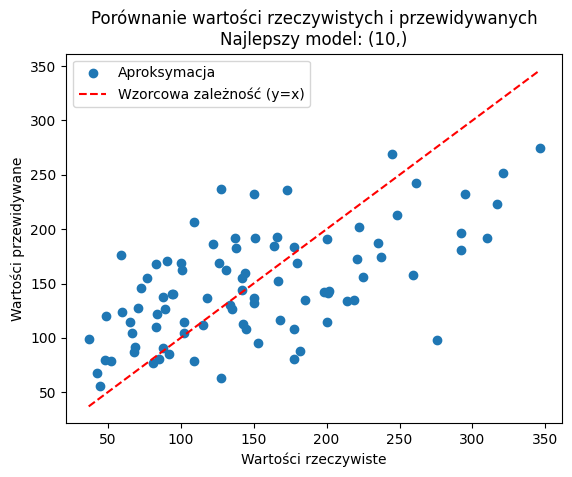

In [64]:
best_result = min(results, key=lambda k: k["mse"])
print(f"Best model is: {best_result['arch']}, with MSE: {best_result['mse']:.6}")

best_model = best_result["regressor"]

# plot true vs predicted
y_pred_best = best_model.predict(X_test)
plt.scatter(y_test, y_pred_best, label="Aproksymacja")

# plot y=x ref
min_val, max_val = y_test.min(), y_test.max()
plt.plot(
    [min_val, max_val], [min_val, max_val], "r--", label="Wzorcowa zależność (y=x)"
)

plt.xlabel("Wartości rzeczywiste")
plt.ylabel("Wartości przewidywane")

plt.title(
    f"Porównanie wartości rzeczywistych i przewidywanych\nNajlepszy model: {best_result['arch']}"
)
plt.legend()
plt.show()

## Zadanie 4

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

In [69]:
model = MLPRegressor(best_result["arch"], max_iter=30_000, random_state=2137)

n_epochs = best_result["regressor"].n_iter_
epoch_list = []
loss_list = []
mse_list = []
mape_list = []
r2_list = []

for epoch in range(n_epochs):
    model.partial_fit(X_train, y_train)
    epoch_list.append(epoch + 1)

    loss_list.append(model.loss_)

    y_pred = model.predict(X_test)
    mse_val = mean_squared_error(y_test, y_pred)
    mape_val = mean_absolute_percentage_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)

    mse_list.append(mse_val)
    mape_list.append(mape_val)
    r2_list.append(r2_val)

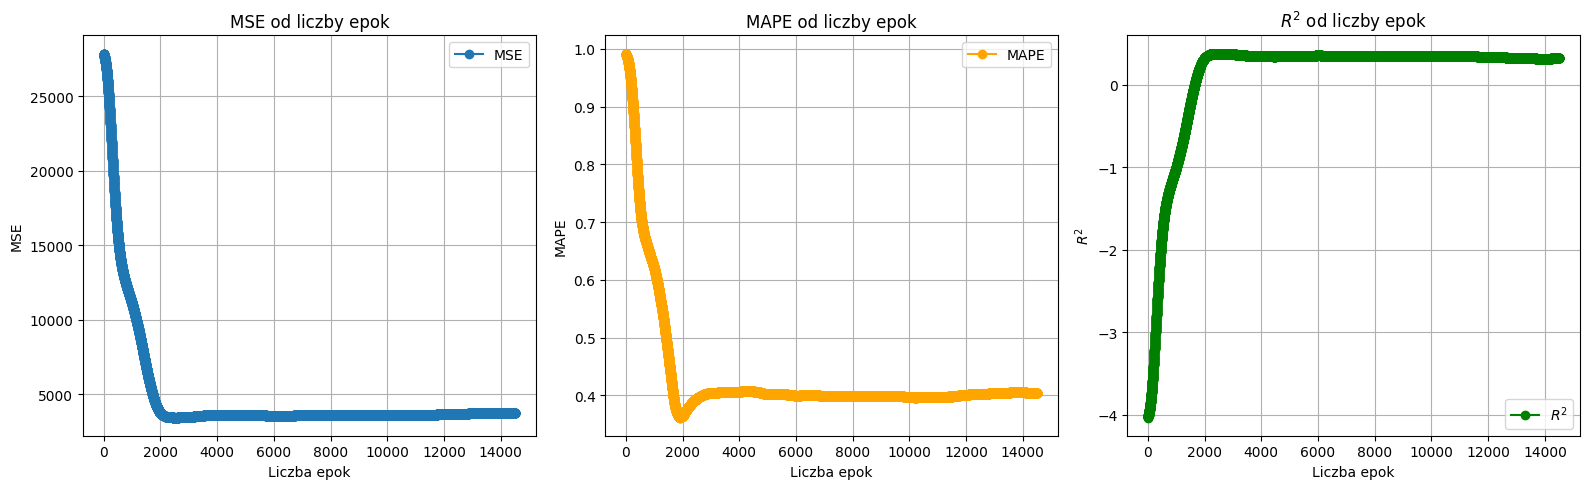

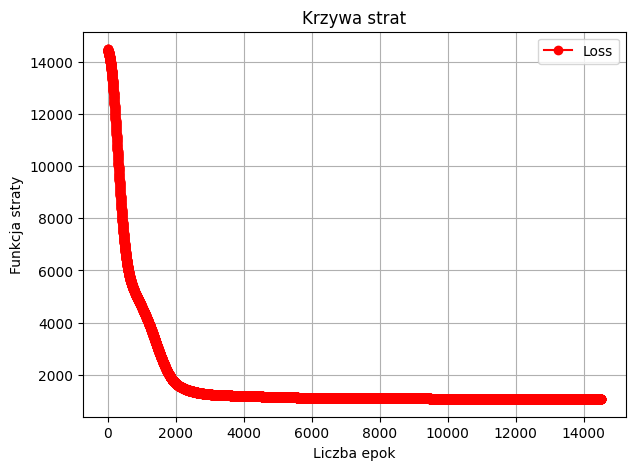

In [70]:
# metrics vs epochs
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(epoch_list, mse_list, marker="o", label="MSE")
ax[0].set_xlabel("Liczba epok")
ax[0].set_ylabel("MSE")
ax[0].set_title("MSE od liczby epok")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(epoch_list, mape_list, marker="o", color="orange", label="MAPE")
ax[1].set_xlabel("Liczba epok")
ax[1].set_ylabel("MAPE")
ax[1].set_title("MAPE od liczby epok")
ax[1].legend()
ax[1].grid(True)

ax[2].plot(epoch_list, r2_list, marker="o", color="green", label=r"$R^2$")
ax[2].set_xlabel("Liczba epok")
ax[2].set_ylabel(r"$R^2$")
ax[2].set_title(r"$R^2$ od liczby epok")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

# loss plot
plt.figure(figsize=(7, 5))
plt.plot(epoch_list, loss_list, marker="o", color="red", label="Loss")
plt.xlabel("Liczba epok")
plt.ylabel("Funkcja straty")
plt.title("Krzywa strat")
plt.legend()
plt.grid(True)
plt.show()